Con el método del codo y el método de la silueta sacamos el numero de clusters óptimo

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

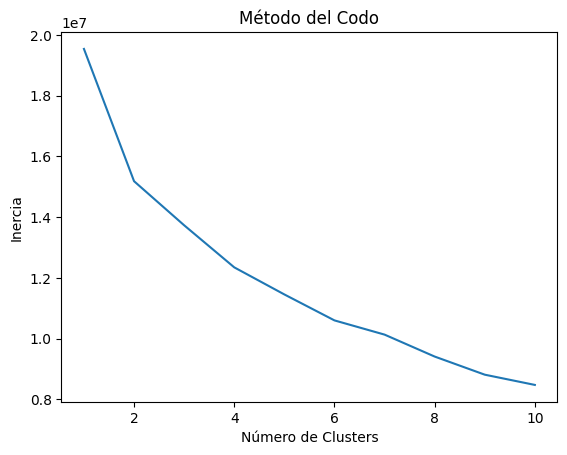

In [9]:
# Leer archivo limpio
df = pd.read_csv("archivo_limpio.csv")

# Escalar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Realizar clustering con diferentes valores de K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Graficar la inercia versus K
plt.plot(range(1, 11), inertia)
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()


In [11]:
# Leer archivo limpio
df = pd.read_csv("archivo_limpio.csv")

# Escalar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Realizar clustering con diferentes valores de K
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar la puntuación de la silueta versus K
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de la Silueta')
plt.title('Método de la Silueta')
plt.show()

C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Leer archivo limpio
df = pd.read_csv("archivo_limpio.csv")

# Escalar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Realizar clustering con KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(df_scaled)

# Agregar las etiquetas de cluster al dataframe original
df["cluster"] = kmeans.labels_

# Mostrar los resultados
print(df.groupby("cluster").mean())

C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


            DEPREG       MUPREG    MESREG       AÑOREG    CLAUNI     EDADHOM  \
cluster                                                                        
0         9.683497   975.960469  6.252140    10.444568  1.000981   28.096671   
1         3.131941   319.707506  6.422452  2014.488015  3.002911   29.072200   
2        14.273615  1436.542095  6.558157  2016.451154  3.002889   29.671117   
3        14.174205  1426.013174  6.304105  2013.604955  3.446893   28.573241   
4         2.717287   276.741838  6.527651  2016.581350  2.745751   30.346839   
5        11.416426  1149.085844  6.421378   481.980603  1.523318  999.000000   
6         3.345662   340.793722  6.420786  2011.204440  3.173255   28.768888   
7        13.617723  1369.714033  6.655973  2016.626680  3.006636   29.627861   
8        14.243452  1433.097925  6.525243  2011.161603  3.677097   28.602873   
9         6.970065   703.151370  6.375883  2013.940130  2.882519   30.402994   

            EDADMUJ    GETHOM    GETMUJ